gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.964534	0.0535927  	0.985629   	0.745635   
1  	34    	0.983815	0.00109887 	0.985629   	0.9825     
2  	35    	0.984503	0.000980261	0.985629   	0.98313    
3  	36    	0.98541 	0.000495348	0.985629   	0.983753   
4  	38    	0.985535	0.000223703	0.985629   	0.985002   
5  	38    	0.985629	2.48253e-16	0.985629   	0.985629   
6  	36    	0.985629	2.22045e-16	0.985629   	0.985629   
7  	37    	0.985629	2.22045e-16	0.985629   	0.985629   
8  	38    	0.985629	2.22045e-16	0.985629   	0.985629   
9  	37    	0.985629	2.22045e-16	0.985629   	0.985629   
10 	40    	0.985629	2.22045e-16	0.985629   	0.985629   
11 	34    	0.985629	2.22045e-16	0.985629   	0.985629   
12 	35    	0.985629	2.22045e-16	0.985629   	0.985629   
13 	38    	0.985629	2.22045e-16	0.985629   	0.985629   
14 	39    	0.985629	2.22045e-16	0.985629   	0.985629   
15 	39    	0.985629	2.22045e-16	0.985629   	0.985629   
16 	36    	0.985629	2.22045e-16	0.985629   	0.98

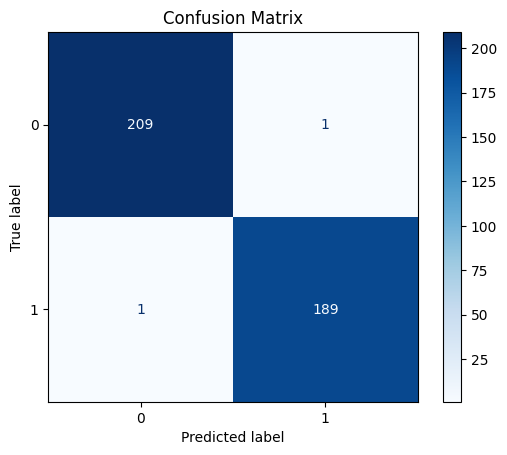

In [42]:
from sklearn_genetic import GASearchCV
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from icecream import ic
from sklearn.ensemble import RandomForestClassifier
from sklearn_genetic.space import Continuous, Categorical, Integer

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

# Prepare data
df = pd.read_csv(
    'data/dataset_3.csv',
    dtype={
        'V1': float,
        'V2': float,
        'V3': float,
        'V4': float,
        'V5': float,
        'V6': float,
        'target': int
    }
)
df = shuffle(df)

X = []
y = []

for row in df.iterrows():
    i1 = row[1]['V1']
    i2 = row[1]['V2']
    i3 = row[1]['V3']
    i4 = row[1]['V4']
    i5 = row[1]['V5']
    i6 = row[1]['V6']
    o = row[1]['target']

    X.append([i1, i2, i3, i4, i5, i6])
    y.append(o)

split_ratio = 0.8
X_split_index = int(len(X) * split_ratio)
y_split_index = int(len(y) * split_ratio)

X_train = X[:X_split_index]  # First 80% of the data
y_train = y[:y_split_index]  # First 80% of the labels
X_test = X[X_split_index:]  # Remaining 20% of the data
y_test = y[y_split_index:]  # Remaining 20% of the labels

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = rf

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# 
# clf = GridSearchCV(estimator = rf, param_grid = param_grid,
#                    cv = 3, n_jobs = -1)

param_grid = {
    'bootstrap': Categorical([True, False]),
    'max_depth': Integer(2, 110),  # Adjusted upper bound
    'max_features': Integer(2, 3),
    'min_samples_leaf': Integer(3, 5),
    'min_samples_split': Integer(8, 12),
    'n_estimators': Integer(100, 1000)
}

clf = GASearchCV(
    estimator=rf,
    scoring='accuracy',
    population_size=20,
    generations=20,
    tournament_size=4,
    elitism=True,
    crossover_probability=0.7,
    mutation_probability=0.2,
    param_grid=param_grid,
    criteria='max',
    algorithm='eaMuPlusLambda',
    n_jobs=-1,
    verbose=True,
    keep_top_k=5
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
